In [6]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Linear_Classifiers_in_Python/datasets/'
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

In [12]:
# load digits data
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

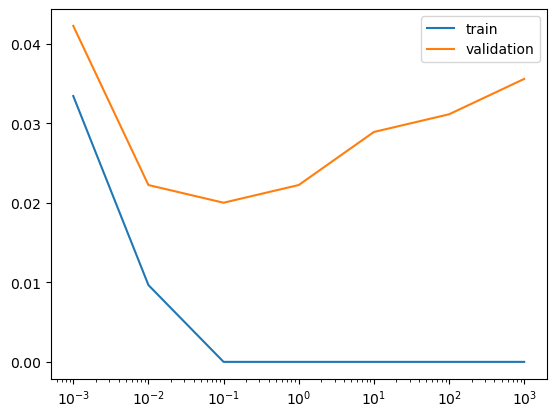

"\nCongrats! As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.\n"

In [13]:
# exercise 01

"""
Regularized logistic regression

In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.
"""

# Instructions

"""

    Loop over the different values of C_value, creating and fitting a LogisticRegression model each time.
    Save the error on the training set and the validation set for each model.
    Create a plot of the training and testing error as a function of the regularization parameter, C.
    Looking at the plot, what's the best value of C?

"""

# solution

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C = C_value, max_iter = 10000, n_jobs = -1)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

#----------------------------------#

# Conclusion

"""
Congrats! As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.
"""

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
# exercise 02

"""
Logistic regression and feature selection

In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course.
"""

# Instructions

"""

    Instantiate a logistic regression object that uses L1 regularization.
    Find the value of C that minimizes cross-validation error.
    Print out the number of selected features for this value of C.

"""

# solution

# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty = 'l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

#----------------------------------#

# Conclusion

"""
Great job! As you can see, a whole lot of features were discarded here.
"""

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 254


'\nGreat job! As you can see, a whole lot of features were discarded here.\n'

In [18]:
inds_ascending = pd.read_csv(path_data + 'inds_asc.csv').dropna().values
inds_descending = pd.read_csv(path_data + 'inds_dsc.csv').dropna().values
vocab = pd.read_csv(path_data + 'vocab.csv').dropna().values

In [24]:
# exercise 03

"""
Identifying the most positive and negative words

In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.
"""

# Instructions

"""

    Find the words corresponding to the 5 largest coefficients.
    Find the words corresponding to the 5 smallest coefficients.

"""

# solution

# Get the indices of the sorted cofficients
##inds_ascending = np.argsort(lr.coef_.flatten()) 
##inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i][0]][0], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i][0]][0], end=", ")
print("\n")

#----------------------------------#

# Conclusion

"""
You got it! The answers sort of make sense, don't they?
"""

Most positive words: favorite, superb, noir, knowing, excellent, 

Most negative words: worst, disappointing, waste, boring, lame, 



"\nYou got it! The answers sort of make sense, don't they?\n"

In [25]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [26]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [32]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red \u0394 class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        # Modify the scatter plot function calls
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k', label='Class 0')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k', label='Class 1')

    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [28]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

model = LinearRegression()

/tmp/ipykernel_2105373/810198082.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k', label='Class 0')
/tmp/ipykernel_2105373/810198082.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k', label='Class 1')


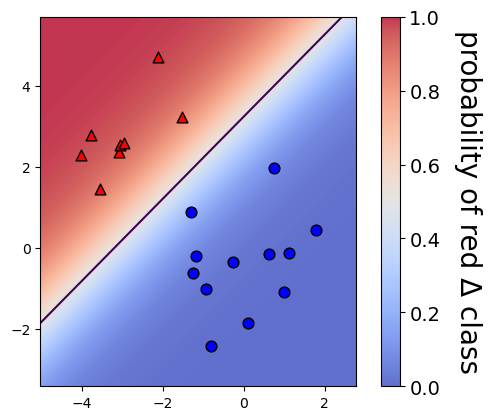

Maximum predicted probability 0.9973143426717812


/tmp/ipykernel_2105373/810198082.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k', label='Class 0')
/tmp/ipykernel_2105373/810198082.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k', label='Class 1')


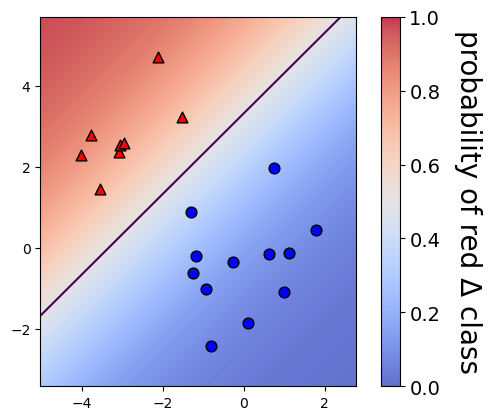

Maximum predicted probability 0.9352061679007128


"\nYou got it! As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!\n"

In [33]:
# exercise 04

"""
Regularization and probabilities

In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.
"""

# Instructions

"""

    Compute the maximum predicted probability.
    Run the provided code and take a look at the plot.

    Create a model with C=0.1 and examine how the plot and probabilities change.

"""

# solution

# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", prob.max())

#----------------------------------#

# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

#----------------------------------#

# Conclusion

"""
You got it! As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!
"""

In [34]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

In [35]:
# load digits data
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

X = digits.data
y = digits.target

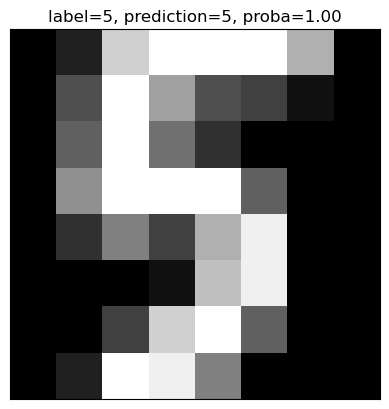

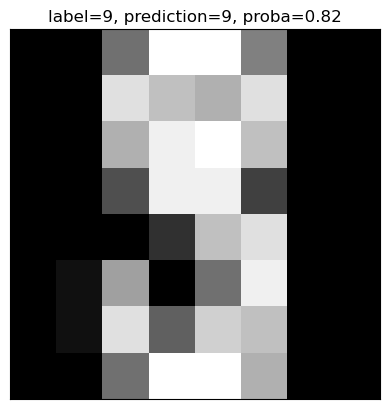

'\nGreat job! As you can see, the least confident example looks like a weird 9, and the most confident example looks like a very typical 5.\n'

In [37]:
# exercise 05

"""
Visualizing easy and difficult examples

In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.
"""

# Instructions

"""

    Fill in the first blank with the index of the digit that the model is most confident about.
    Fill in the second blank with the index of the digit that the model is least confident about.
    Observe the images: do you agree that the first one is less ambiguous than the second?

"""

# solution

lr = LogisticRegression(max_iter = 10000, n_jobs = -1)
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

#----------------------------------#

# Conclusion

"""
Great job! As you can see, the least confident example looks like a weird 9, and the most confident example looks like a very typical 5.
"""

In [38]:
# load digits data
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [41]:
# exercise 06

"""
Fitting multi-class logistic regression

In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into X_train, y_train, X_test, and y_test.
"""

# Instructions

"""

    Fit a one-vs-rest logistic regression classifier by setting the multi_class parameter and report the results.
    Fit a multinomial logistic regression classifier by setting the multi_class parameter and report the results.

"""

# solution

# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class = 'ovr', max_iter = 10000, n_jobs = -1)
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class = 'multinomial', max_iter = 10000, n_jobs = -1)
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

#----------------------------------#

# Conclusion

"""
Nice work! As you can see, the accuracies of the two methods are fairly similar on this data set.
"""

OVR training accuracy: 0.9970304380103935
OVR test accuracy    : 0.9755555555555555
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9644444444444444


'\nNice work! As you can see, the accuracies of the two methods are fairly similar on this data set.\n'

In [ ]:
# exercise 07

"""
Visualizing multi-class logistic regression

In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme.

The data set is loaded into X_train and y_train. The two logistic regression objects,lr_mn and lr_ovr, are already instantiated (with C=100), fit, and plotted.

Notice that lr_ovr never predicts the dark blue class… yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.
"""

# Instructions

"""

    Create a new logistic regression object (also with C=100) to be used for binary classification.
    Visualize this binary classifier with plot_classifier… does it look reasonable?

"""

# solution

# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C = 100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

#----------------------------------#

# Conclusion

"""
Nice work! As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.
"""

In [ ]:
# exercise 08

"""
One-vs-rest SVM

As motivation for the next and final chapter on support vector machines, we'll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into X_train, y_train, X_test, and y_test .

Instead of using LinearSVC, we'll now use scikit-learn's SVC object, which is a non-linear "kernel" SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.
"""

# Instructions

"""

    Fit an SVC called svm_class_1 to predict class 1 vs. other classes.
    Plot this classifier.

"""

# solution

# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train == 1)
plot_classifier(X_train, y_train == 1, svm_class_1)

#----------------------------------#

# Conclusion

"""
Cool, eh?! The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.
"""